# SUPER MARKET ANALYSIS


## Importing libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

### Reading Data

In [14]:
df=pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [181]:
df.shape

(896, 5)

In [16]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [17]:
df.shape

(896, 5)

## Finding NULL values

In [28]:
df.isnull()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
891,False,False,False,False,False
892,False,False,False,False,False
893,False,False,False,False,False
894,False,False,False,False,False


In [29]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

## Checking Type of data

In [30]:
nrow=df.shape[0]
ncol=df.shape[1]
if nrow//ncol>0 :
    print("given dataset is structured")
else :
     print("given dataset is not structured")

given dataset is structured


In [31]:
df.dtypes

Store ID                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [32]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [33]:
df.tail()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610
895,896,1174,1429,1110,54340


## Data visualization

Text(0, 0.5, 'sales')

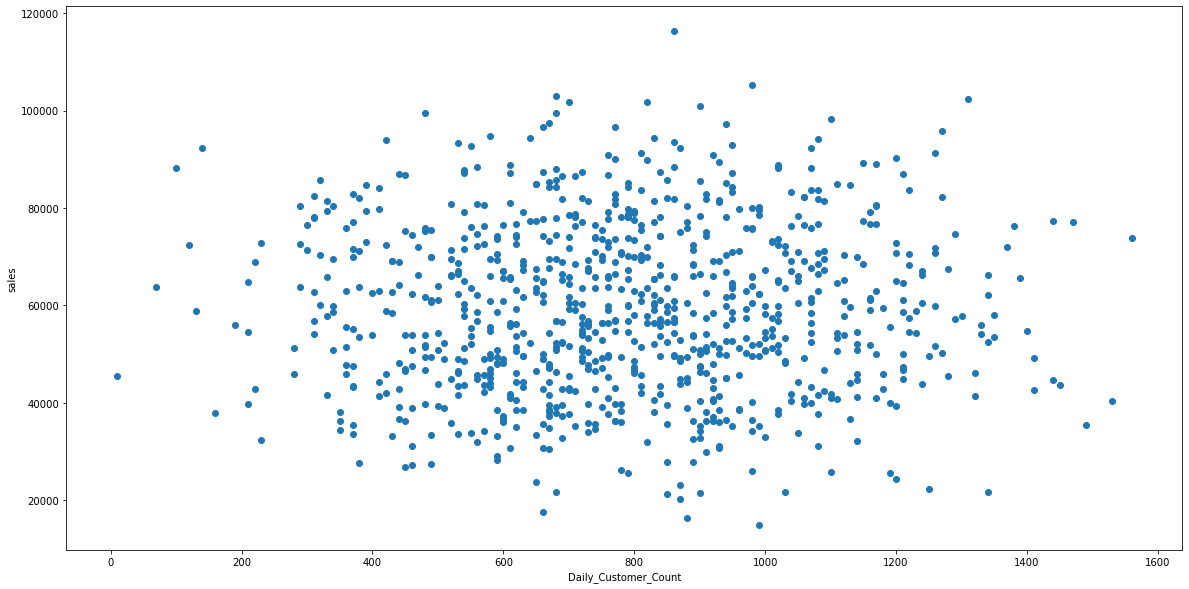

In [34]:
plt.scatter(df.Daily_Customer_Count,df.Store_Sales)
plt.xlabel("Daily_Customer_Count")
plt.ylabel("sales")

Text(0, 0.5, 'sales')

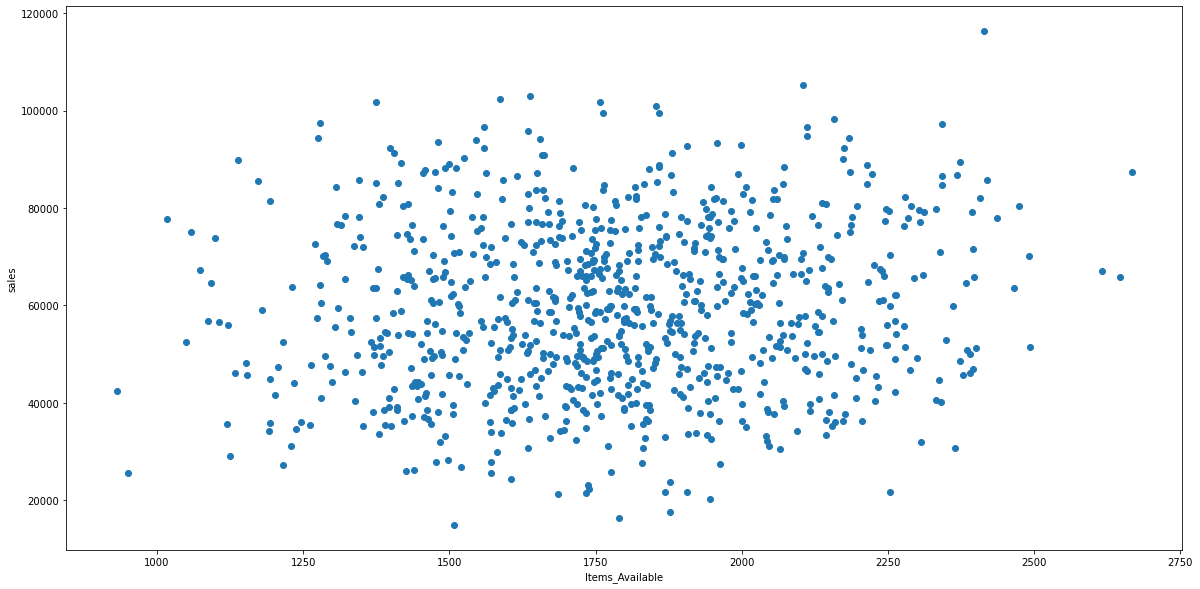

In [35]:
plt.scatter(df.Items_Available,df.Store_Sales)
plt.xlabel("Items_Available")
plt.ylabel("sales")

Text(0, 0.5, 'sales')

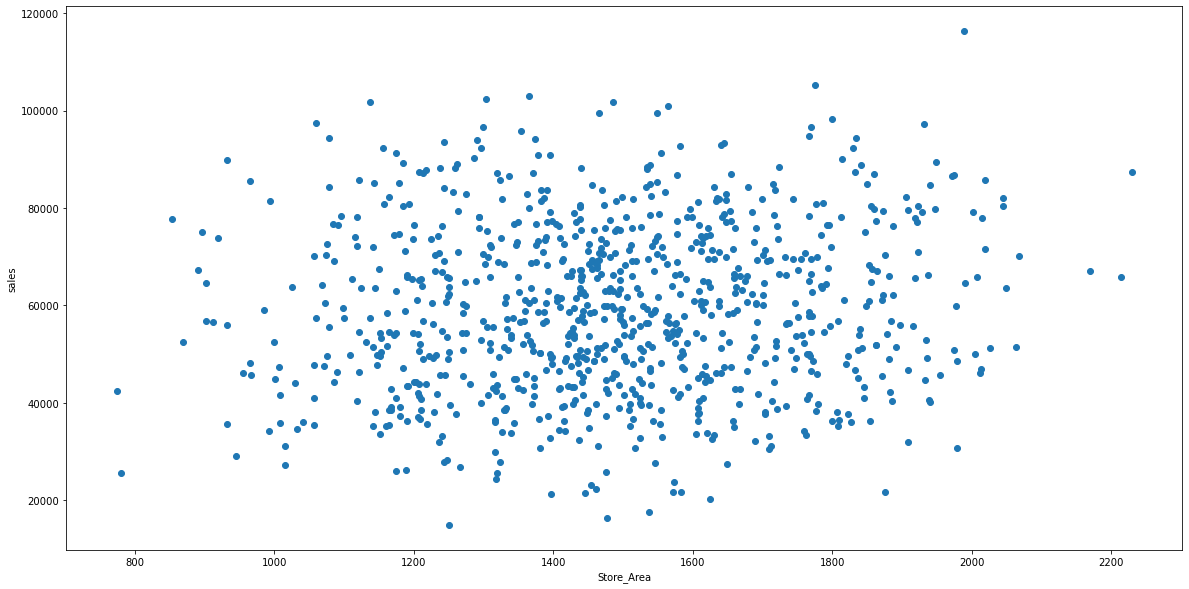

In [169]:
plt.scatter(df.Store_Area,df.Store_Sales)
plt.xlabel("Store_Area")
plt.ylabel("sales")

### Parameters are not related lineraly nor sigmoidal nor pol

## Correlation

In [170]:
X=df.drop('Store_Sales',axis=1)
y=df["Store_Sales"]

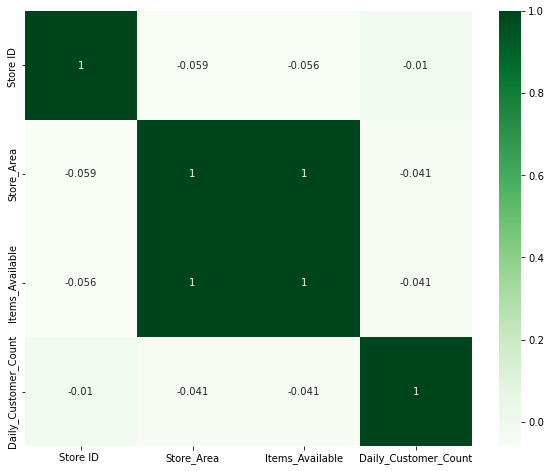

In [171]:
plt.figure(figsize=(10,8))
cor=X.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

## Dropping extra column which have similar trend of other column

In [172]:
def correlation(df,min):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>min:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [173]:
corr_features=correlation(X,0.8)
len(set(corr_features))

1

## Dropping the feature which have correlation greater than 0.8

In [174]:
x=X.drop(corr_features,axis=1)


In [175]:
x.head()

,Store ID,Store_Area,Daily_Customer_Count
0,1,1659,530
1,2,1461,210
2,3,1340,720
3,4,1451,620
4,5,1770,450


## importing algorithm to train the model

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Splitting data into training set and testing set

In [177]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25)

# Create a object for linear regression classifier 

In [157]:
model=LinearRegression()
# model=SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

## Fit the model

In [158]:
model.fit(X_train,y_train)
    

LinearRegression()

In [159]:
model.score(X_train,y_train)

0.01763003979303812

### Score of the model is too low because we have used linear regression but we can clearly see the graph no parameters are lineraly related so we need to check for all the algorithms for the best fit of the data

In [160]:
model.score(X_test,y_test)

0.0066915171021678654

In [161]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

In [162]:
model=[SVC(),LogisticRegression(),LinearRegression(),tree.DecisionTreeClassifier(),RandomForestClassifier(),KMeans(n_clusters=5)]

In [163]:
score=[]
for i in model:
    i.fit(X_train,y_train)
    i.predict(X_test)
    score.append(i.score(x,y))
print(score)

C:\Users\gayathriboddu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.006696428571428571, 0.234375, 0.015028639893549078, 0.75, 0.75, -102908709.88674656]


### The best models are  DecisionTreeClassifier which is tree.DecisionTreeClassifier() and RandomForestClassifier() with 0.75

In [178]:
model=tree.DecisionTreeClassifier()

In [179]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Final predictions after training model 

In [180]:
model.predict(X_test[0:5])

array([67610, 66160, 86890, 49270, 69450], dtype=int64)

### We can still use gridsearcv (hyperparameter tuning to find the right arguments for corresponding algorithms) and make improvements in the given data set

# ***********THE END*********************